<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#1.-Global-EDA" data-toc-modified-id="1.-Global-EDA-2">1. Global EDA</a></span></li><li><span><a href="#2.-Features-Selection-&amp;-Engineering" data-toc-modified-id="2.-Features-Selection-&amp;-Engineering-3">2. Features Selection &amp; Engineering</a></span><ul class="toc-item"><li><span><a href="#2.1.-Clean-target-Product-Category" data-toc-modified-id="2.1.-Clean-target-Product-Category-3.1">2.1. Clean target Product Category</a></span></li></ul></li><li><span><a href="#Sample-Data-&amp;-Images" data-toc-modified-id="Sample-Data-&amp;-Images-4">Sample Data &amp; Images</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#organizer-:-fill-only-one-cat-folder" data-toc-modified-id="organizer-:-fill-only-one-cat-folder-4.0.1">organizer : fill only one cat folder</a></span></li></ul></li></ul></li><li><span><a href="#3.-Langage-pre-processing" data-toc-modified-id="3.-Langage-pre-processing-5">3. Langage pre-processing</a></span><ul class="toc-item"><li><span><a href="#3.1.-Text---feature-'description'-EDA" data-toc-modified-id="3.1.-Text---feature-'description'-EDA-5.1">3.1. Text - feature 'description' EDA</a></span></li><li><span><a href="#3.2.-Text-processing" data-toc-modified-id="3.2.-Text-processing-5.2">3.2. Text processing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Process-text-step-1-(with-default-stop-words)" data-toc-modified-id="Process-text-step-1-(with-default-stop-words)-5.2.0.1">Process text step 1 (with default stop words)</a></span></li><li><span><a href="#Remove-stop-words-:-pre-study" data-toc-modified-id="Remove-stop-words-:-pre-study-5.2.0.2">Remove stop words : pre-study</a></span></li><li><span><a href="#Process-step-2-:-with-custom-stopwords" data-toc-modified-id="Process-step-2-:-with-custom-stopwords-5.2.0.3">Process step 2 : with custom stopwords</a></span></li><li><span><a href="#Text-processing-results" data-toc-modified-id="Text-processing-results-5.2.0.4">Text processing results</a></span></li></ul></li></ul></li><li><span><a href="#tf-idf-matrix" data-toc-modified-id="tf-idf-matrix-5.3">tf-idf matrix</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#'raw'-tfidf" data-toc-modified-id="'raw'-tfidf-5.3.0.1">'raw' tfidf</a></span></li><li><span><a href="#as-preprocessed-tfidf-matrix" data-toc-modified-id="as-preprocessed-tfidf-matrix-5.3.0.2">as preprocessed tfidf matrix</a></span></li><li><span><a href="#tsne-projections" data-toc-modified-id="tsne-projections-5.3.0.3">tsne projections</a></span></li></ul></li></ul></li><li><span><a href="#LDA" data-toc-modified-id="LDA-5.4">LDA</a></span></li><li><span><a href="#NMF-(alternative)" data-toc-modified-id="NMF-(alternative)-5.5">NMF (alternative)</a></span></li><li><span><a href="#3.x-what-is-the-best-topics-number?" data-toc-modified-id="3.x-what-is-the-best-topics-number?-5.6">3.x what is the best topics number?</a></span></li></ul></li><li><span><a href="#4.-Image-pre-processing" data-toc-modified-id="4.-Image-pre-processing-6">4. Image pre-processing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Size" data-toc-modified-id="Size-6.0.1">Size</a></span><ul class="toc-item"><li><span><a href="#Contrast-&amp;-brightness" data-toc-modified-id="Contrast-&amp;-brightness-6.0.1.1">Contrast &amp; brightness</a></span></li></ul></li></ul></li><li><span><a href="#SIFT" data-toc-modified-id="SIFT-6.1">SIFT</a></span><ul class="toc-item"><li><span><a href="#organizer-:-compute-processing-and-fill-cat-folders" data-toc-modified-id="organizer-:-compute-processing-and-fill-cat-folders-6.1.1">organizer : compute processing and fill cat folders</a></span></li></ul></li><li><span><a href="#feature-matching-with-SIFT" data-toc-modified-id="feature-matching-with-SIFT-6.2">feature matching with SIFT</a></span><ul class="toc-item"><li><span><a href="#BoVW-bags-of-visual-words" data-toc-modified-id="BoVW-bags-of-visual-words-6.2.1">BoVW bags of visual words</a></span></li></ul></li></ul></li><li><span><a href="#5.-Combine-and-reduce" data-toc-modified-id="5.-Combine-and-reduce-7">5. Combine and reduce</a></span></li><li><span><a href="#6.-Clustering" data-toc-modified-id="6.-Clustering-8">6. Clustering</a></span></li></ul></div>

Etienne Lardeur 2020 - P6 Project Data Scientist - OpenClassrooms

# Introduction

"Place de marché" wishes to launch its e-marketplace, where sellers offers to customers their products for purchase, providing a picture and details such as description.<br/>
Until now, any product is unreliabily attached manually to a category. <br/>
The purpose of this Project is to study an automated process to ensure the right attachment of any product to its category : a Classification Engine.<br/>  

Raw Data to start study consist in a csv file and 1050 pictures. <br/>
First step is to perform an EDA and select an adequate {pre-processing, dimension reducer, clusterer} for any {description, picture} of each product. <br/>

Our goal is to provide a visual proof of concept of our classification engine's ability to group products of the same category.

In [1]:
%load_ext pycodestyle_magic
%flake8_on
# PEP8 tested

In [2]:
import numpy as np
import pandas as pd
from random import randint
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
import seaborn as sns
import operator
# get the path
import os.path
# paths imutils
from imutils import paths
# opencv
import cv2
# scipy
from scipy import ndimage
from scipy.spatial import distance
# clustering
from sklearn.cluster import KMeans
# text processing
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import re
from nltk.stem.snowball import SnowballStemmer
from collections import Counter
from operator import itemgetter
# projections
from sklearn.manifold import TSNE
# image
# from PIL import Image
# gensim - coherence for topic size
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf



# 1. Global EDA

At this step : is the description we've to work with only the description features, or a set of features we've to select?

In [3]:
# read csv file (products description)
data = pd.read_csv('data/flipkart_com-ecommerce_sample_1050.csv')

In [4]:
# content
data.sample(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
383,54754ccd18f2a75c53de68806176392a,2015-12-01 06:13:00 +0000,http://www.flipkart.com/netis-wf-2301/p/itmecz...,Netis WF-2301,"[""Computers >> Network Components >> Routers >...",RTRECZANMW6UAQ5A,5249.0,5249.0,54754ccd18f2a75c53de68806176392a.jpg,False,Buy Netis WF-2301 only for Rs. 5249 from Flipk...,No rating available,No rating available,Netis,"{""product_specification""=>[{""key""=>""In The Box..."
1039,3b96a152c8fac4421fb67b6190584976,2016-03-21 07:22:11 +0000,http://www.flipkart.com/reiki-crystal-products...,Reiki Crystal Products Showpiece - 6 cm,"[""Home Decor & Festive Needs >> Showpieces >> ...",SHIEHY2BWXJSRZFZ,2500.0,1200.0,3b96a152c8fac4421fb67b6190584976.jpg,False,Key Features of Reiki Crystal Products Showpie...,No rating available,No rating available,Reiki Crystal Products,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
266,0e73201f6d8807776e1d21c969078289,2015-12-01 12:40:44 +0000,http://www.flipkart.com/pigeon-kadhai-1-2-l/p/...,Pigeon Kadhai 1.2 L,"[""Kitchen & Dining >> Cookware >> Pots & Pans ...",PTPE9DQXGXYQXNBP,945.0,899.0,0e73201f6d8807776e1d21c969078289.jpg,False,"Pigeon Kadhai 1.2 L (Aluminium, Glass, Non-sti...",No rating available,No rating available,Pigeon,"{""product_specification""=>[{""key""=>""Pan Type"",..."


In [5]:
# size
data.shape

(1050, 15)

The file consist in 1050 entries and 15 features, with image containing the name of the picture file (pattern unique_id.jpg).

In [6]:
# possible primary keys (no duplicate)
no_duplicate_feat = [
    col for col in data.columns if len(data[col].unique()) == len(data[col])]
print("features without duplicate : {}".format(no_duplicate_feat))

features without duplicate : ['uniq_id', 'product_url', 'product_name', 'pid', 'image', 'description']


Among those features, we understang that uniq_id & image (as uniq_id.jpg) are the same identifier, while pid is an alternate id that links to url, built out of numerous features, including this pid.

In [7]:
# missing data
data.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

Brand name is missing 338 times and seems to be optional in this study (could give key of cat descriptor. <br/>

In [8]:
# replace nan brand by '' (no brand name)
data['brand'] = data['brand'].fillna('')

In [9]:
# remove useless columns
data = data.drop(columns=[
    'uniq_id',
    'crawl_timestamp',
    'product_url',
    'pid',
    'retail_price',
    'discounted_price',
    'is_FK_Advantage_product',
    'product_rating',
    'overall_rating',
    'product_specifications',
])

In [10]:
# concatenate extended extd_description of a product
data['extd_description'] = data['brand'] + ' ' + data['product_name'] + ' ' + data['description']

Decision to go on with image. Need to ensure consistency between 'image' and jpg pictures files in folder.

In [11]:
# check link consistency (return 0 if ok)
# jpg_list : files in folders
jpg_list = os.listdir('Data/Images')
# image_list : filenames in dataset
image_list = data['image'].tolist()
len(set(image_list) - set(jpg_list))

0

In [12]:
# build image file path from data['image']
img_name = data['image'][85]
img_path = os.path.join('Data/Images', img_name)

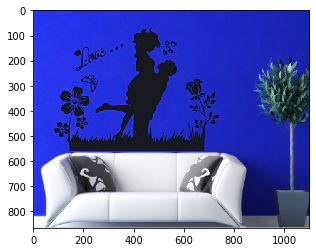

In [13]:
# read and show
img = cv2.imread(img_path)
plt.imshow(img)

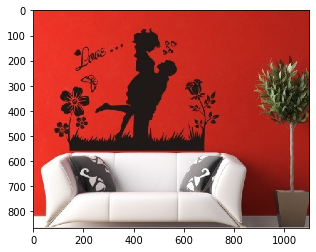

In [14]:
# blue <-> red shall be switched : convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# 2. Features Selection & Engineering

At this step, a minimal selection of input is : image & description, with target to catch within product_category_tree. 

## 2.1. Clean target Product Category

Idea is to extract from the product_category_tree, a list of categories. We've to find the right decomposition's level and the corresponding list to work with. <br/>
Our interpretation of a right decomposition's level is the adequate balance of items available to learn from the dataset, i.e. :
- enough products available in the train set  <br/>
- the less dissimilarity between products of a given category <br/>

While the first criteria belongs to basic EDA, the second one is more complex and will be the result of words and picture pre-precessing.

In [15]:
# work on category tree
data.loc[0, 'product_category_tree']

'["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

In [16]:
len(data.loc[0, 'product_category_tree'])

112

The tree consists in level separated by ">>", that may be cut with "..."

In [17]:
# nb of decomposition's levels
data['tree_depth'] = data['product_category_tree'].apply(
    lambda x: len(x.split('>>')))
data['tree_depth'] = data['tree_depth'] - 1

C:\Users\etien\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


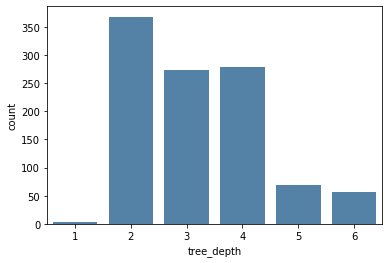

In [18]:
sns.countplot(data['tree_depth'], color='steelblue')

In [19]:
# flaten category levels
cat_levels = []
for i in range(1, 8):
    cat_levels.append('cat_lvl_'+str(i))

In [20]:
# flaten category_tree as levels cat_lvl
for index in data.index:
    depth = len(
        data.loc[
            index, 'product_category_tree'].split("\"")[1].split(" >> "))
    for i, lvl in enumerate(cat_levels):
        if i + 1 <= depth:
            data.loc[
                index, lvl] = data.loc[
                index, 'product_category_tree'].split("\"")[1].split(" >> ")[i]

In [21]:
data.head(3)

,product_name,product_category_tree,image,description,brand,extd_description,tree_depth,cat_lvl_1,cat_lvl_2,cat_lvl_3,cat_lvl_4,cat_lvl_5,cat_lvl_6,cat_lvl_7
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,Elegance,Elegance Elegance Polyester Multicolor Abstrac...,3,Home Furnishing,Curtains & Accessories,Curtains,Elegance Polyester Multicolor Abstract Eyelet ...,NaN,NaN,NaN
1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,Sathiyas,Sathiyas Sathiyas Cotton Bath Towel Specificat...,4,Baby Care,Baby Bath & Skin,Baby Bath Towels,Sathiyas Baby Bath Towels,"Sathiyas Cotton Bath Towel (3 Bath Towel, Red,...",NaN,NaN
2,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,Eurospa,Eurospa Eurospa Cotton Terry Face Towel Set Ke...,4,Baby Care,Baby Bath & Skin,Baby Bath Towels,Eurospa Baby Bath Towels,Eurospa Cotton Terry Face Towel Set (20 PIECE ...,NaN,NaN


In [22]:
# remove unvalid categories (cutted level names)
for lvl in cat_levels:
    mask = data[lvl].str.contains(r'\.\.\.', na=False)
    data[lvl][mask] = np.nan

C:\Users\etien\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [23]:
data.head(3)

,product_name,product_category_tree,image,description,brand,extd_description,tree_depth,cat_lvl_1,cat_lvl_2,cat_lvl_3,cat_lvl_4,cat_lvl_5,cat_lvl_6,cat_lvl_7
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,Elegance,Elegance Elegance Polyester Multicolor Abstrac...,3,Home Furnishing,Curtains & Accessories,Curtains,NaN,NaN,NaN,NaN
1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,Sathiyas,Sathiyas Sathiyas Cotton Bath Towel Specificat...,4,Baby Care,Baby Bath & Skin,Baby Bath Towels,Sathiyas Baby Bath Towels,NaN,NaN,NaN
2,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,Eurospa,Eurospa Eurospa Cotton Terry Face Towel Set Ke...,4,Baby Care,Baby Bath & Skin,Baby Bath Towels,Eurospa Baby Bath Towels,NaN,NaN,NaN


In [24]:
# see how many valid values are available for each lvl
for lvl in cat_levels:
    print(lvl + ' has %d valid values' % len(data[lvl].unique()))

cat_lvl_1 has 7 valid values
cat_lvl_2 has 62 valid values
cat_lvl_3 has 239 valid values
cat_lvl_4 has 318 valid values
cat_lvl_5 has 217 valid values
cat_lvl_6 has 96 valid values
cat_lvl_7 has 51 valid values


Text(0.5, 1.02, 'Level 1 Prodcut Categories')

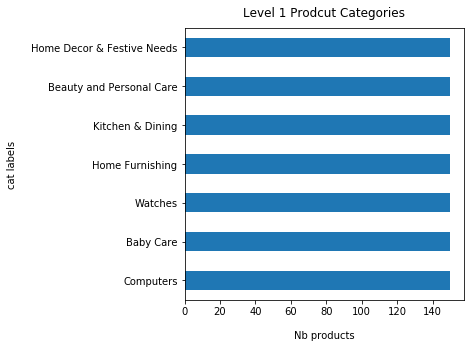

In [25]:
data['cat_lvl_1'].value_counts().plot(
    kind='barh',
    figsize=(5, 5)).invert_yaxis()
plt.xlabel('Nb products', labelpad=14)
plt.ylabel('cat labels', labelpad=14)
plt.title('Level 1 Prodcut Categories', y=1.02)

Each level 1 cat is populated by 1/7 of the products (150 out of 1050). <br/>
Next level comes with 62 labels, meaning we could expect an average of 17.5 products. Let's see how is this balanced.

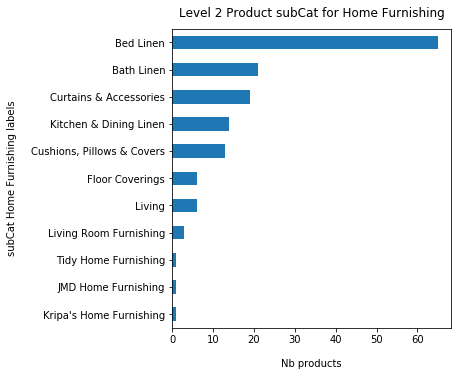

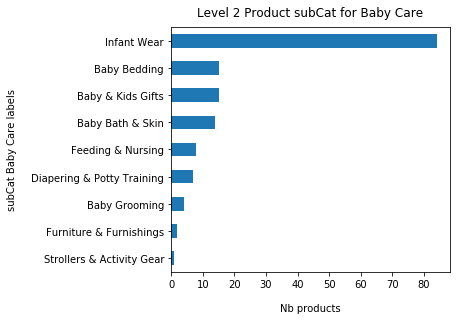

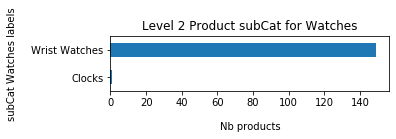

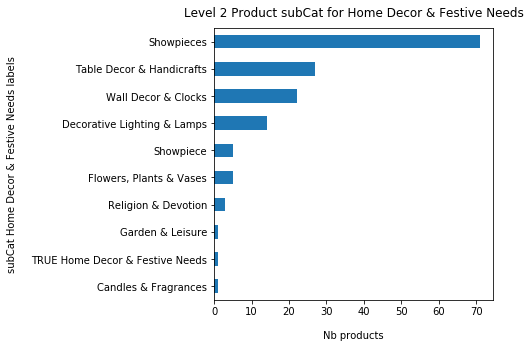

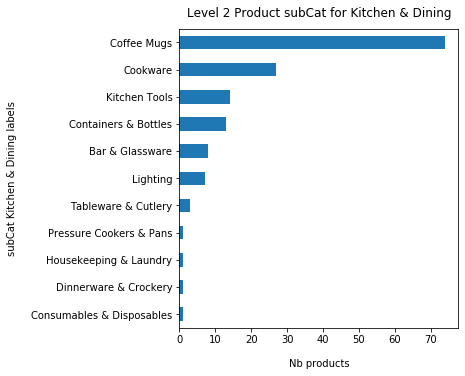

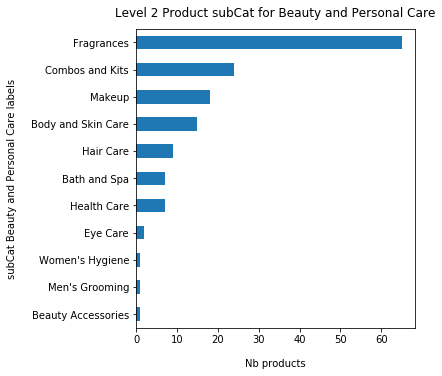

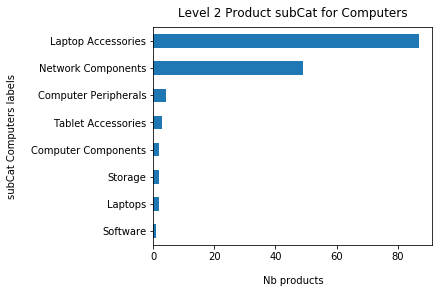

In [26]:
for cat in data['cat_lvl_1'].unique():
    subset = data[data['cat_lvl_1'] == cat]
    size = len(subset['cat_lvl_2'].unique()) / 2
    subset['cat_lvl_2'].value_counts().plot(
        kind='barh',
        figsize=(5, size)).invert_yaxis()
    plt.xlabel('Nb products', labelpad=14)
    plt.ylabel('subCat ' + str(cat) + ' labels', labelpad=14)
    plt.title('Level 2 Product subCat for ' + str(cat), y=1.02)
    plt.show()

this lead to a quite unbalanced division. 

if a sublevel contains a sudivision into products with very distinct expected pictures, this would be interesting either to keep those sublevel, or remove the alternate product. <br/>
for instance, this would lead to level 2 cat, dropping those without enough images to learn from.

# Sample Data & Images

In [27]:
data_sample = data[data['cat_lvl_2'] == 'Infant Wear']

In [28]:
data_sample.shape

(84, 14)

### organizer : fill only one cat folder

In [29]:
# input and ouput path
dir_read = 'Data/Images'
dir_write = 'Data/Sample_Images'

for index, row in data_sample.iterrows():
    # get url of the product's image
    img_name = row['image']
    # create the path to the image file
    img_path = os.path.join(dir_read, img_name)
    # Read the file and convert it to color image
    img_file = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_file, cv2.COLOR_BGR2RGB)
    # resize the image to 500*500 pixels
    '''
    img_sqr = resize2SquareKeepingAspectRation(
        img_rgb,
        size=500,
        interpolation=cv2.INTER_AREA)
    '''
    # auto-adjustment of contrast and luminosity
    # img_preprocessed, alpha, beta = automatic_brightness_and_contrast(img_sqr)
    # save the preprocessed image
    if not os.path.exists(dir_write):
        os.makedirs(dir_write)
    img_preprocessed_path = os.path.join(dir_write,img_name)
    cv2.imwrite(img_preprocessed_path, img_rgb)

21:80: E501 line too long (80 > 79 characters)
25:51: E231 missing whitespace after ','


# 3. Langage pre-processing

## 3.1. Text - feature 'description' EDA

In [30]:
# pick a description 
data['description'][85]

"Key Features of Smart Wall Guru Medium Adhesive Sticker We Showcase A Variety Of Wall Decal Categories Study room Looking Awesome Living room Bath room Attractive Guest room Kitchen Easy to Install Easy to Remove Easy To Clean All Wall Decal are front Matte Finish, water resistant & packaged between two layers.,Smart Wall Guru Medium Adhesive Sticker (Pack of 1) Price: Rs. 299 'Smart Wall Guru'' gives u a pure beautiful house with our decoration wall stickers,wall decals & all kind of designs for your home decoration.These stickers are made of self adhesive PVC vinyl and very easy to apply on plane surface. These are the great suppliment of wallpaper,wall color and another decoration method. Thnkss…,Specifications of Smart Wall Guru Medium Adhesive Sticker (Pack of 1) In The Box Number of Contents in Sales Package Pack of 1 Sales Package 1 Sticker General Ideal Use Home, Child Bedroom, Bedroom Scratch-resistant Yes Brand Smart Wall Guru Laminated Yes Type Adhesive Size in Number 58.43

1:21: W291 trailing whitespace


In [31]:
def word_count(text):
    return len(str(text).split(' '))

In [32]:
# Get the word count
data['word_count'] = data['description'].apply(word_count)
data['word_count'].describe()

count    1050.000000
mean       80.321905
std        77.407537
min        18.000000
25%        31.000000
50%        47.000000
75%       103.000000
max       589.000000
Name: word_count, dtype: float64

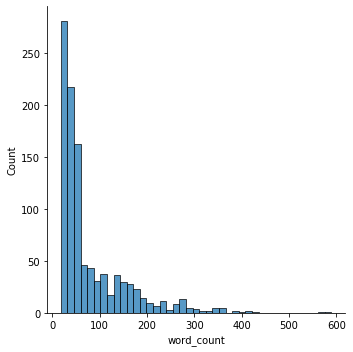

In [33]:
# Plot a hist of the word counts
sns.displot(
    x='word_count',
    data=data
)

## 3.2. Text processing

There is a bunch of various ways to pre-process text. We simply get rid of punctuation, switch to lower case, suppress stopwords.

Créer des paires de document (article, highlights)

Suppression de la ponctuation

Séparation en token en minuscules

Suppression des stopwords pour les articles

Calcul des fréquences et tf-idf sur les deux types de documents

Enregistrement du nouveau jeu de données d’entraînement pour usage ultérieur

In [34]:
# nltk.download('stopwords')

In [35]:
# nltk.download('punkt')

In [36]:
# List of punctuation from 'string'
punc = list(set(string.punctuation))
len(punc)

32

In [37]:
punc.append('°')
punc

['{',
 '/',
 '@',
 '[',
 '$',
 '=',
 '.',
 ':',
 '^',
 '#',
 '-',
 '?',
 '\\',
 '(',
 '`',
 '+',
 '%',
 ']',
 "'",
 ';',
 '_',
 '~',
 '<',
 '|',
 '"',
 ',',
 '!',
 '>',
 '&',
 ')',
 '}',
 '*',
 '°']

In [38]:
# default stop words
default_stopwords = set(
    ENGLISH_STOP_WORDS).union(
    set(nltk.corpus.stopwords.words('english')))
len(default_stopwords)

378

#### Process text step 1 (with default stop words)
Switch to lower case and filter on alphabetic without punctuation and stemming.

In [39]:
# set only default
stop_words = default_stopwords

In [40]:
''' how to ensure being processed AFTER tokenization?
# lower case
descriptions = list(map(str.lower, descriptions))
# remove punctuation through regex
punctuation = re.compile(r'[_.,;\/#!?:()&-]+')
descriptions = [re.sub(punctuation, ' ', x) for x in descriptions]
# remove numeric data
numeric = re.compile(r'\d+')
descriptions = [re.sub(numeric, '', x) for x in descriptions]
'''

" how to ensure being processed AFTER tokenization?\n# lower case\ndescriptions = list(map(str.lower, descriptions))\n# remove punctuation through regex\npunctuation = re.compile(r'[_.,;\\/#!?:()&-]+')\ndescriptions = [re.sub(punctuation, ' ', x) for x in descriptions]\n# remove numeric data\nnumeric = re.compile(r'\\d+')\ndescriptions = [re.sub(numeric, '', x) for x in descriptions]\n"

5:33: W605 invalid escape sequence '\/'
8:24: W605 invalid escape sequence '\d'


In [41]:
def process_text(text):
    text = nltk.word_tokenize(text)
    text = [each.lower() for each in text]
    text = [re.sub('[0-9]+', '', each) for each in text]
    text = [SnowballStemmer('english').stem(each) for each in text]
    text = [w for w in text if w not in punc]
    text = [w for w in text if w not in stop_words]
    text = [each for each in text if len(each) > 3]
    text = [each for each in text if ' ' not in each]
    return text

In [42]:
data['p_description'] = data['description'].apply(process_text)

In [43]:
# Get the word count
data['p_word_count'] = data['p_description'].apply(word_count)
data['p_word_count'].describe()

count    1050.000000
mean       44.100000
std        40.778582
min         9.000000
25%        18.000000
50%        28.000000
75%        57.000000
max       310.000000
Name: p_word_count, dtype: float64

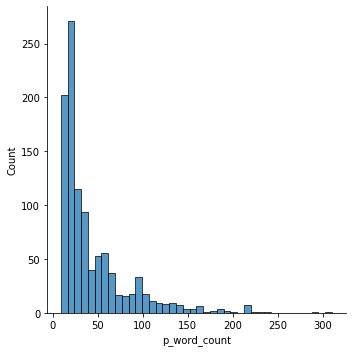

In [44]:
# Plot a hist of the word counts
sns.displot(
    x='p_word_count',
    data=data
)

#### Remove stop words : pre-study

In [45]:
# Get the top 20 most common words among all the description
p_text = data['p_description']

# Flaten the list of lists
p_text = [item for sublist in p_text for item in sublist]

# Top 20
top_20 = pd.DataFrame(
    Counter(p_text).most_common(20),
    columns=['word', 'frequency']
)

top_20

,word,frequency
0,onli,888
1,product,868
2,free,613
3,replac,570
4,ship,569
5,deliveri,567
6,genuin,564
7,cash,564
8,price,558
9,guarante,473


In [46]:
# get the custom stopwords (until flipkart.com)
top_14 = pd.DataFrame(
    Counter(p_text).most_common(14),
    columns=['word', 'frequency']
)

custom_stopwords = top_14['word'].tolist()

In [47]:
custom_stopwords

['onli',
 'product',
 'free',
 'replac',
 'ship',
 'deliveri',
 'genuin',
 'cash',
 'price',
 'guarante',
 'flipkart.com',
 'featur',
 'onlin',
 'design']

#### Process step 2 : with custom stopwords

In [48]:
# set default + custom
stop_words = default_stopwords.union(custom_stopwords)

In [49]:
data['p_description'] = data['description'].apply(process_text)
# Get the final word count
data['p_word_count'] = data['p_description'].apply(word_count)
data['p_word_count'].describe()

count    1050.000000
mean       36.572381
std        41.959386
min         1.000000
25%         7.000000
50%        19.000000
75%        53.000000
max       281.000000
Name: p_word_count, dtype: float64

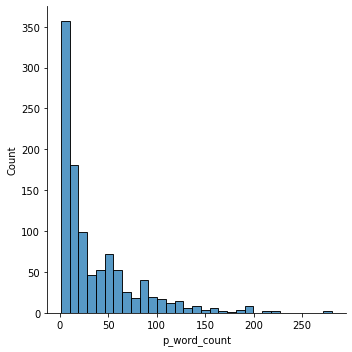

In [50]:
# Plot a hist of the word counts
sns.displot(
    x='p_word_count',
    data=data
)

#### Text processing results

In [51]:
# pick a processed description 
data['p_description'][85]

['smart',
 'wall',
 'guru',
 'medium',
 'adhes',
 'sticker',
 'showcas',
 'varieti',
 'wall',
 'decal',
 'categori',
 'studi',
 'room',
 'look',
 'awesom',
 'live',
 'room',
 'bath',
 'room',
 'attract',
 'guest',
 'room',
 'kitchen',
 'easi',
 'instal',
 'easi',
 'remov',
 'easi',
 'clean',
 'wall',
 'decal',
 'matt',
 'finish',
 'water',
 'resist',
 'packag',
 'layers.',
 'smart',
 'wall',
 'guru',
 'medium',
 'adhes',
 'sticker',
 'pack',
 'smart',
 'wall',
 'guru',
 'pure',
 'beauti',
 'hous',
 'decor',
 'wall',
 'sticker',
 'wall',
 'decal',
 'kind',
 'home',
 'decoration.thes',
 'sticker',
 'self',
 'adhes',
 'vinyl',
 'veri',
 'easi',
 'appli',
 'plane',
 'surfac',
 'great',
 'suppliment',
 'wallpap',
 'wall',
 'color',
 'anoth',
 'decor',
 'method',
 'thnkss…',
 'specif',
 'smart',
 'wall',
 'guru',
 'medium',
 'adhes',
 'sticker',
 'pack',
 'number',
 'content',
 'sale',
 'packag',
 'pack',
 'sale',
 'packag',
 'sticker',
 'general',
 'ideal',
 'home',
 'child',
 'bedroom',
 '

1:31: W291 trailing whitespace


## tf-idf matrix
terms importance weighting within one description among all the possible descriptions :
- Term Frequency : how often the term occurs within any single description
- x Inverse Document Frequency : how rarely are the description where term occurs, accross any drescriptions (inverse log +1)

Note that we cant compute tf-idf with many parameters, and either on raw descriptions or to the already tokenized desriptions.

#### 'raw' tfidf

In [52]:
# create tf-idf vectorizer
tfidf_matrix_vectorizer = TfidfVectorizer(
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    analyzer='word',
    max_df=0.8,
    min_df=2,
    ngram_range=(1, 1),
)

# Application of the tf-idf vectorizer
corpus = data['description']
raw_matrix = tfidf_matrix_vectorizer.fit_transform(corpus)

# densify ?
raw_matrix_dense = raw_matrix.todense()

! we should try to put our manual pre-processing into sklearn tf-idf vectorization :
- token_pattern, to remove numbers (or a specific tokenizer)
- custom stop words
- max_df : according to our custom stop words (! une vingtaine seulement)
- min_df : not calculated yet


In [53]:
# build vocab
raw_vocab = sorted(
    tfidf_matrix_vectorizer.vocabulary_.items(), key=operator.itemgetter(1))

# sorted list of words
raw_vocab = [word for (word, word_indice) in raw_vocab]

# create matrix
raw_tfidf_matrix = pd.DataFrame(raw_matrix_dense, columns=raw_vocab)

raw_tfidf_matrix.head()

,001,005,01,03,04,05tg,06,085,099,10,...,yes,york,young,youth,youthful,yuva,zero,zipper,zone,zyxel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.074495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04614,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.040360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.034580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### as preprocessed tfidf matrix

In [54]:
# create a dummy_function

def dummy_function(text):
    return text


# create tf-idf vectorizer without tokenizer
wo_tokenizer_tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_function,
    preprocessor=dummy_function,
    token_pattern=None
)

# Application of the tf-idf vectorizer
corpus = data['p_description']
matrix = wo_tokenizer_tfidf.fit_transform(corpus)

# densify ?
matrix_dense = matrix.todense()
print(matrix_dense.shape[1])

# build vocab
vocab = sorted(
    wo_tokenizer_tfidf.vocabulary_.items(), key=operator.itemgetter(1))

# sorted list of words
vocab = [word for (word, word_indice) in vocab]

# create matrix
tfidf_matrix = pd.DataFrame(matrix_dense, columns=vocab)

tfidf_matrix.head()

3920


,**the,*.*mm,",bela",",specif",-actu,-actx,-age,-avail,-avoid,-bit,...,zero,zikrak,zinc,zingalalaa,zipexterior,zipper,zone,zoom,zora,zyxel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### tsne projections

In [55]:


def tsne_proj(input, data_tf):
    tfidf_tsne = TSNE(n_components=2).fit_transform(input)
    tfidf_tsne_df = pd.DataFrame(
        tfidf_tsne,
        columns=['tsne 2D - One', 'tsne 2D - Two'])
    tfidf_proj = pd.merge(data_tf,
                          tfidf_tsne_df,
                          left_index=True,
                          right_index=True,
                          how='inner')
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x='tsne 2D - One',
                    y='tsne 2D - Two',
                    hue='cat_lvl_1',
                    palette='Set2',
                    data=tfidf_proj)

In [56]:
# prepare cat_lvl_1 labels
data_tf = data.reset_index()[['cat_lvl_1']]

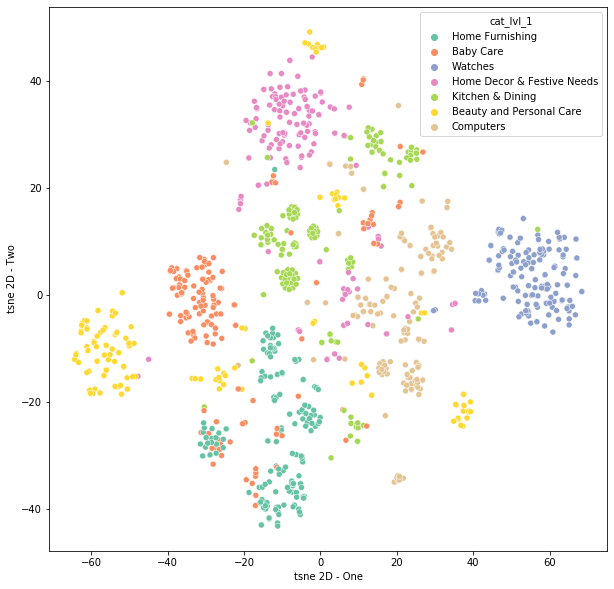

In [57]:
tsne_proj(tfidf_matrix, data_tf)

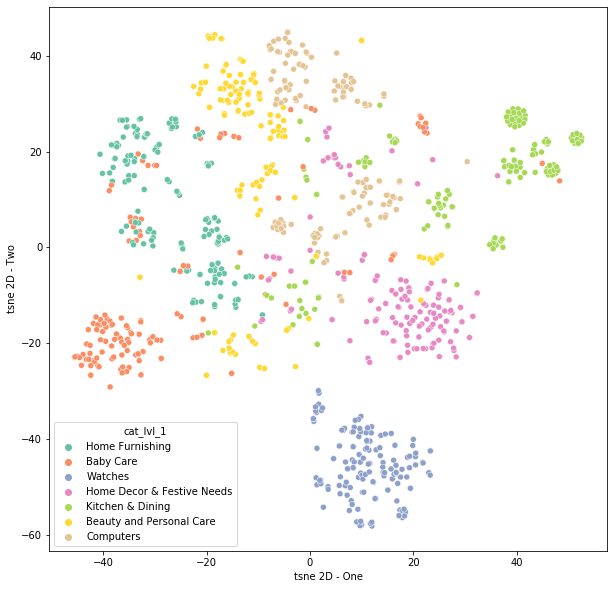

In [58]:
tsne_proj(raw_tfidf_matrix, data_tf)

## LDA 

build topics out of data

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# create count vectorizer
tf_vectorizer = CountVectorizer(
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    analyzer='word',
    max_df=0.8,
    min_df=2,
    ngram_range=(1, 1),
)

# Application of the tf-idf vectorizer
corpus = data['description']
tf = tf_vectorizer.fit_transform(corpus)


In [60]:
# try as much topics as first category levels
n_topics = 7
# Instanciate LDA
lda = LatentDirichletAllocation(
    n_components=n_topics,
    max_iter=5,
    learning_method='online',
    learning_offset=50.,
    random_state=0)
# apply lda
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=7, random_state=0)

In [61]:
# to display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [62]:
def topic_table(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        t = (topic_idx)
        topics[t] = [feature_names[i] for i in top_words(topic, n_top_words)]
    return pd.DataFrame(topics)

In [63]:
def top_words(topic, n_top_words):
    return topic.argsort()[:-n_top_words - 1:-1]  

In [64]:
# the 7 topics lda way
display_topics(lda, tf_vectorizer.get_feature_names(), 20)

Topic 0:
showpiece products brass art price bowl cm gold towel box face set beautiful towels home bath soft bowls ganesha cream
Topic 1:
adapter battery laptop replacement power quality warranty charger vgn vaio product 19 smartpro 5v usb designed 9a lapguard voltage 75
Topic 2:
mugs mug perfect bring coffee ceramic love beautifully designed make prithish quality special designs affordable gifts holiday don just sure
Topic 3:
mug ceramic coffee perfect material home hair product gift price safe design quality tea size loved ml specifications rockmantra exclusive
Topic 4:
cm features pack specifications general color baby package sales number box type model cotton laptop warranty brand print key fabric
Topic 5:
products delivery buy genuine shipping cash free 30 day replacement guarantee flipkart com online prices best cm showpiece india watch
Topic 6:
skin analog watch sticker shapes men combo wall women vinyl laptop set resistant mouse apply great water dial pad free


In [65]:
topic_table(lda, tf_vectorizer.get_feature_names(), 7)

,0,1,2,3,4,5,6
0,showpiece,adapter,mugs,mug,cm,products,skin
1,products,battery,mug,ceramic,features,delivery,analog
2,brass,laptop,perfect,coffee,pack,buy,watch
3,art,replacement,bring,perfect,specifications,genuine,sticker
4,price,power,coffee,material,general,shipping,shapes
5,bowl,quality,ceramic,home,color,cash,men
6,cm,warranty,love,hair,baby,free,combo


In [66]:
# lda restults
lda_result = lda.transform(tf)

In [67]:
lda_result.shape

(1050, 7)

In [68]:
lda_result_df = pd.DataFrame(lda_result)

In [69]:
lda_result_df.sample(3)

,0,1,2,3,4,5,6
228,0.003879,0.003861,0.003861,0.003863,0.003876,0.976797,0.003862
568,0.004083,0.004082,0.004083,0.004083,0.004083,0.510716,0.468870
825,0.004927,0.004927,0.004928,0.004926,0.004946,0.795236,0.180110


In [70]:
lda_result_df['Best_Topic'] = lda_result_df.idxmax(axis=1)

In [71]:
lda_result_df.sample(3)

,0,1,2,3,4,5,6,Best_Topic
663,0.008405,0.008404,0.008405,0.008404,0.279930,0.678047,0.008405,5
38,0.002426,0.002426,0.002422,0.002427,0.985441,0.002434,0.002423,4
89,0.008977,0.008939,0.008939,0.008976,0.199477,0.755749,0.008943,5


In [72]:
lda_tsne = TSNE(n_components=2).fit_transform(lda_result)

In [73]:
lda_tsne_df = pd.DataFrame(lda_tsne, columns=['tsne 2D - One', 'tsne 2D - Two'])

In [74]:
lda_proj = pd.merge(data_tf,
                    lda_tsne_df,
                    left_index=True,
                    right_index=True,
                    how='inner')

In [75]:
lda_proj = pd.merge(lda_proj,
                    lda_result_df['Best_Topic'],
                    left_index=True,
                    right_index=True,
                    how='inner')

In [76]:
lda_proj

,cat_lvl_1,tsne 2D - One,tsne 2D - Two,Best_Topic
0,Home Furnishing,-1.962314,14.630932,4
1,Baby Care,5.747346,16.985003,4
2,Baby Care,10.600702,19.510344,0
3,Home Furnishing,-20.604696,-0.793223,4
4,Home Furnishing,-21.178345,-1.079813,4
...,...,...,...,...
1045,Baby Care,18.286776,4.355350,6
1046,Baby Care,4.032607,33.282150,3
1047,Baby Care,34.289173,-15.486687,5
1048,Baby Care,30.612326,-18.464699,5


In [77]:
lda_proj.sample(3)

,cat_lvl_1,tsne 2D - One,tsne 2D - Two,Best_Topic
365,Beauty and Personal Care,-34.694118,26.990381,5
406,Beauty and Personal Care,-35.654629,-21.006937,5
466,Baby Care,-14.553492,5.317787,4


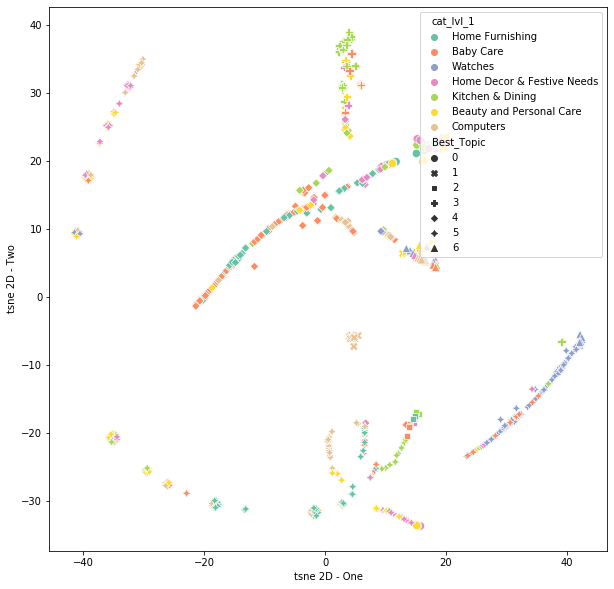

In [78]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x='tsne 2D - One',
                y='tsne 2D - Two',
                hue='cat_lvl_1',
                style='Best_Topic',
                palette='Set2',
                s=70,
                data=lda_proj)

## NMF (alternative)

input : tf_idf matrix (dense or not seems ok)

In [79]:
from sklearn.decomposition import NMF

In [80]:
# keep same topics size than lvl 1 cat
no_topics = 7

# create NMF
nmf = NMF(
    n_components=no_topics,
    random_state=1,
    alpha=.1,
    l1_ratio=.5,
    init='nndsvd')

# Fitting the model
nmf.fit(matrix)


NMF(alpha=0.1, init='nndsvd', l1_ratio=0.5, n_components=7, random_state=1)

In [81]:
def topic_table(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        t = (topic_idx)
        topics[t] = [feature_names[i] for i in top_words(topic, n_top_words)]
    return pd.DataFrame(topics)

In [82]:
# the 7 topics nmf way
display_topics(nmf, wo_tokenizer_tfidf.get_feature_names(), 8)

Topic 0:
watch analog discount india great women sonata dial
Topic 1:
babi girl fabric cotton dress sleev print neck
Topic 2:
rockmantra ceram porcelain thrill start perman stay pick
Topic 3:
abstract blanket doubl singl quilt raymond multicolor comfort
Topic 4:
coffe perfect ceram printland gift enjoy love tea/coffe
Topic 5:
laptop batteri cell skin warranti pavilion lapguard shape
Topic 6:
towel bath cotton soft hand face terri absorb


In [83]:
# nmf restults
nmf_result = nmf.transform(matrix)

In [84]:
nmf_result.shape

(1050, 7)

In [85]:
nmf_result_df = pd.DataFrame(nmf_result)

In [86]:
nmf_result_df.sample(3)

,0,1,2,3,4,5,6
380,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
392,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
963,0.0,0.075074,0.0,0.028944,0.0,0.011758,0.0


In [87]:
nmf_result_df['Best_Topic'] = nmf_result_df.idxmax(axis=1)

In [88]:
nmf_result_df.sample(3)

,0,1,2,3,4,5,6,Best_Topic
280,0.122447,0.093822,0.0,0.000000,0.0,0.024522,0.0,0
83,0.000000,0.193995,0.0,0.000000,0.0,0.000000,0.0,1
771,0.000000,0.064331,0.0,0.095369,0.0,0.000000,0.0,3


In [89]:
nmf_tsne = TSNE(n_components=2).fit_transform(nmf_result)

In [90]:
nmf_tsne_df = pd.DataFrame(nmf_tsne, columns=['tsne 2D - One', 'tsne 2D - Two'])

In [91]:
nmf_proj = pd.merge(data_tf,
                    nmf_tsne_df,
                    left_index=True,
                    right_index=True,
                    how='inner')

In [92]:
nmf_proj = pd.merge(nmf_proj,
                    nmf_result_df['Best_Topic'],
                    left_index=True,
                    right_index=True,
                    how='inner')

In [93]:
nmf_proj

,cat_lvl_1,tsne 2D - One,tsne 2D - Two,Best_Topic
0,Home Furnishing,22.805946,-6.071582,3
1,Baby Care,-46.751419,1.589420,6
2,Baby Care,-45.737930,1.900103,6
3,Home Furnishing,23.801075,-8.832289,1
4,Home Furnishing,24.029240,-8.702000,1
...,...,...,...,...
1045,Baby Care,-17.048426,-2.425792,3
1046,Baby Care,-16.496773,9.782494,5
1047,Baby Care,-12.287642,-11.702816,0
1048,Baby Care,-11.204245,-12.754657,0


In [94]:
nmf_proj.sample(3)

,cat_lvl_1,tsne 2D - One,tsne 2D - Two,Best_Topic
721,Home Furnishing,25.610880,0.272583,3
331,Beauty and Personal Care,-15.115306,-13.141154,0
302,Home Decor & Festive Needs,-13.807042,-13.580853,0


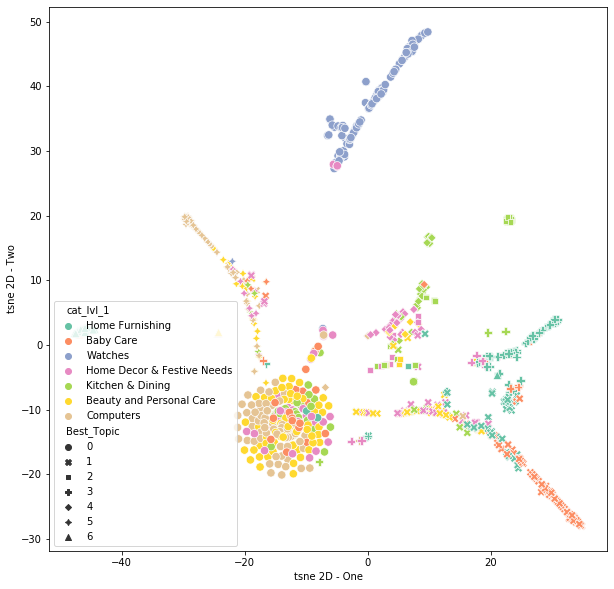

In [95]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x='tsne 2D - One',
                y='tsne 2D - Two',
                hue='cat_lvl_1',
                style='Best_Topic',
                palette='Set2',
                s=70,
                data=nmf_proj)

## 3.x what is the best topics number?

At this step, we want to get an idea of how the number of topics chosen in LDA or NMF approach may affect this preview of expected results. <br/>
It's stated by many study that coherence score is the best way to assess a topic number because it give. Perplexity embedded in sklearn appears to mathematical. Further more, its intrinsec versus extrinsec.

In [96]:
# Use Gensim's NMF to get the best num of topics via coherence score
texts = data['p_description']

In [97]:
# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

In [98]:
len(dictionary)

3920

In [99]:
# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=2,
    no_above=0.9
)

In [100]:
len(dictionary)

1695

In [101]:
dictionary.token2id

{'abstract': 0,
 'anti': 1,
 'apart': 2,
 'appeal': 3,
 'attent': 4,
 'beauti': 5,
 'bodi': 6,
 'brand': 7,
 'bright': 8,
 'bring': 9,
 'close': 10,
 'color': 11,
 'contemporari': 12,
 'content': 13,
 'creat': 14,
 'curtain': 15,
 'dimens': 16,
 'door': 17,
 'draw': 18,
 'eleg': 19,
 'enhanc': 20,
 'environ': 21,
 'eyelet': 22,
 'filter': 23,
 'floral': 24,
 'general': 25,
 'given': 26,
 'good': 27,
 'heart': 28,
 'height': 29,
 'high': 30,
 'home': 31,
 'length': 32,
 'light': 33,
 'look': 34,
 'make': 35,
 'materi': 36,
 'metal': 37,
 'model': 38,
 'moment': 39,
 'morn': 40,
 'multicolor': 41,
 'number': 42,
 'pack': 43,
 'packag': 44,
 'polyest': 45,
 'print': 46,
 'qualiti': 47,
 'right': 48,
 'room': 49,
 'sale': 50,
 'shrinkag': 51,
 'slide': 52,
 'smooth': 53,
 'soft': 54,
 'sooth': 55,
 'special': 56,
 'specif': 57,
 'stitch': 58,
 'style': 59,
 'sure': 60,
 'thing': 61,
 'type': 62,
 'want': 63,
 'welcom': 64,
 'wish': 65,
 'world': 66,
 'wrinkl': 67,
 'bath': 68,
 'blue': 69,

In [102]:
# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

In [103]:
# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(1, 77, 3))

In [104]:
# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

22:1: W293 blank line contains whitespace
30:1: W293 blank line contains whitespace


In [105]:
# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]


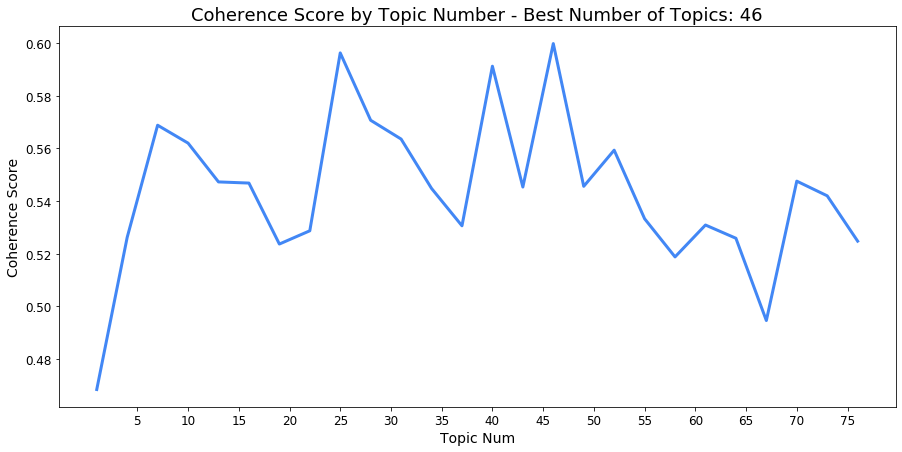

13:80: E501 line too long (109 > 79 characters)


In [106]:
# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

plt.show()

# 4. Image pre-processing

sort images by category?
after processing

cv2 seems better that PIL

### Size

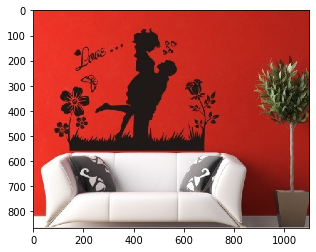

In [107]:
# build image file path
img_name = data['image'].loc[85]
img_path = os.path.join('Data/Images', img_name)
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [108]:
print(img.shape)

(866, 1100, 3)


In [109]:
# get and store image sizes
size = []
for ind in data.index:
    img = cv2.imread(
        os.path.join(
            'Data/Images',
            data['image'].loc[ind]))
    size.append([img.shape[0], img.shape[1]])

In [110]:
sizes = pd.DataFrame(size)

In [111]:
sizes.columns = ['height', 'width']

In [112]:
sizes.head()

,height,width
0,3600,3600
1,1293,2388
2,729,982
3,831,1100
4,2088,2670


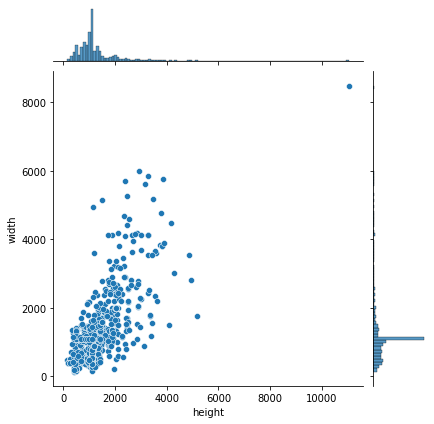

In [113]:
# overview of image sizes
sns.jointplot(
    x=sizes['height'],
    y=sizes['width'],
    data=sizes)

In [114]:
# resize image without distorsion with openCV, thx to stackoverflow J

def resize2SquareKeepingAspectRation(img, size, interpolation):
    h, w = img.shape[:2]
    c = None if len(img.shape) < 3 else img.shape[2]
    if h == w:
        return cv2.resize(img, (size, size), interpolation)
    if h > w:
        dif = h
    else:
        dif = w
    x_pos = int((dif - w)/2.)
    y_pos = int((dif - h)/2.)
    if c is None:
        # comment original mask : black
        # mask = np.zeros((dif, dif), dtype=img.dtype)
        # new mask : white
        mask = np.full((dif, dif), fill_value=255, dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w] = img[:h, :w]
    else:
        # comment original mask : black
        # mask = np.zeros((dif, dif, c), dtype=img.dtype)
        # new mask : white
        mask = np.full((dif, dif, c), fill_value=255, dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w, :] = img[:h, :w, :]
    return cv2.resize(mask, (size, size), interpolation)

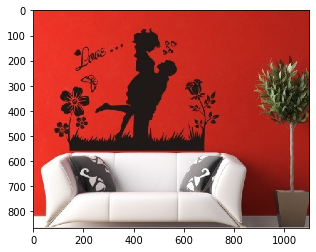

In [115]:
# get back to our sample
img_name = data['image'].loc[85]
img_path = os.path.join('Data/Images', img_name)
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

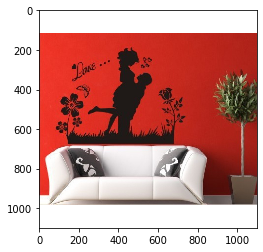

In [116]:
scaled_img = resize2SquareKeepingAspectRation(
    img,
    1100,
    interpolation=cv2.INTER_AREA)
plt.imshow(scaled_img)

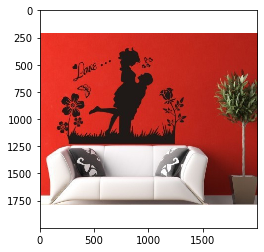

In [117]:
scaled_img = resize2SquareKeepingAspectRation(
    img,
    2000,
    interpolation=cv2.INTER_AREA)
plt.imshow(scaled_img)

#### Contrast & brightness

In [118]:
def convertScale(img, alpha, beta):
    """Add bias and gain to an image with saturation arithmetics. Unlike
    cv2.convertScaleAbs, it does not take an absolute value, which would lead to
    nonsensical results (e.g., a pixel at 44 with alpha = 3 and beta = -210
    becomes 78 with OpenCV, when in fact it should become 0).
    """

    new_img = img * alpha + beta
    new_img[new_img < 0] = 0
    new_img[new_img > 255] = 255
    return new_img.astype(np.uint8)

3:80: E501 line too long (80 > 79 characters)


In [119]:
# Automatic brightness and contrast optimization with optional histogram clipping
def automatic_brightness_and_contrast(image, clip_hist_percent=25):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate grayscale histogram
    hist = cv2.calcHist([gray],[0],None,[256],[0,256])
    hist_size = len(hist)

    # Calculate cumulative distribution from the histogram
    accumulator = []
    accumulator.append(float(hist[0]))
    for index in range(1, hist_size):
        accumulator.append(accumulator[index -1] + float(hist[index]))

    # Locate points to clip
    maximum = accumulator[-1]
    clip_hist_percent *= (maximum/100.0)
    clip_hist_percent /= 2.0

    # Locate left cut
    minimum_gray = 0
    while accumulator[minimum_gray] < clip_hist_percent:
        minimum_gray += 1

    # Locate right cut
    maximum_gray = hist_size -1
    while accumulator[maximum_gray] >= (maximum - clip_hist_percent):
        maximum_gray -= 1

    # Calculate alpha and beta values
    alpha = 255 / (maximum_gray - minimum_gray)
    beta = -minimum_gray * alpha

    '''
    # Calculate new histogram with desired range and show histogram 
    new_hist = cv2.calcHist([gray],[0],None,[256],[minimum_gray,maximum_gray])
    plt.plot(hist)
    plt.plot(new_hist)
    plt.xlim([0,256])
    plt.show()
    '''

    auto_result = convertScale(image, alpha=alpha, beta=beta)
    return (auto_result, alpha, beta)


1:80: E501 line too long (81 > 79 characters)
6:31: E231 missing whitespace after ','
6:35: E231 missing whitespace after ','
6:40: E231 missing whitespace after ','
6:46: E231 missing whitespace after ','
6:49: E231 missing whitespace after ','
13:47: E225 missing whitespace around operator
26:31: E225 missing whitespace around operator
35:68: W291 trailing whitespace


alpha 1.191588785046729
beta -47.663551401869164


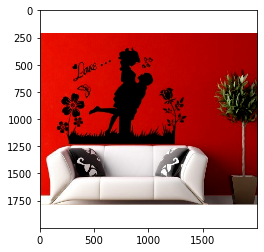

In [120]:
auto_result, alpha, beta = automatic_brightness_and_contrast(scaled_img)
print('alpha', alpha)
print('beta', beta)
plt.imshow(auto_result)

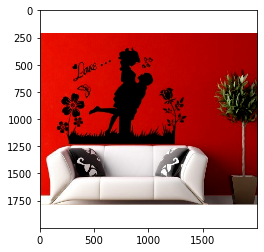

In [121]:
plt.imshow(auto_result)

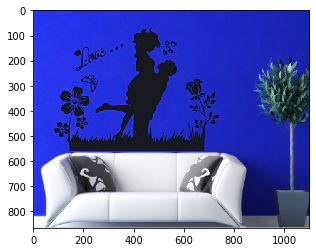

In [122]:
# get back to our sample
img_name = data['image'].loc[85]
img_path = os.path.join('Data/Images', img_name)
img = cv2.imread(img_path)
plt.imshow(img)



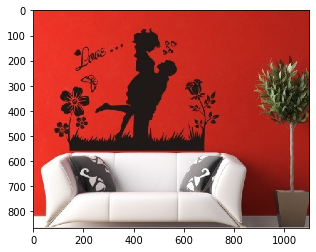

In [123]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

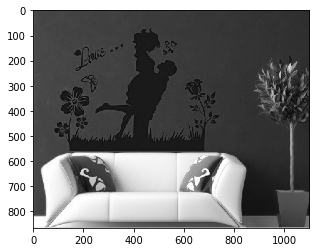

In [124]:
gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray", vmin=0, vmax=255)

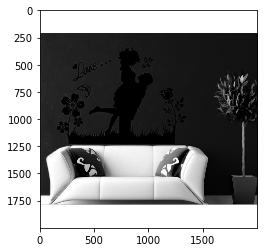

In [125]:
gray_result = cv2.cvtColor(auto_result, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_result, cmap="gray", vmin=0, vmax=255)

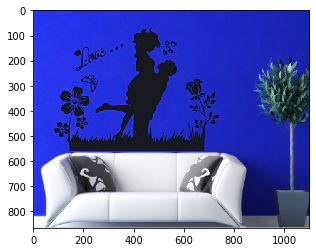

In [128]:
# Reading the image
img = cv2.imread(img_path)
plt.imshow(img) 

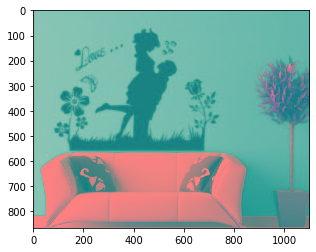

2:4: E225 missing whitespace around operator


In [129]:
# Converting image to LAB Color model
lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
plt.imshow(lab)

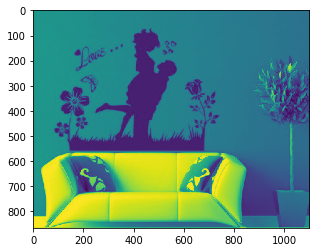

In [130]:
# Splitting the LAB image to different channels
l, a, b = cv2.split(lab)
plt.imshow(l)

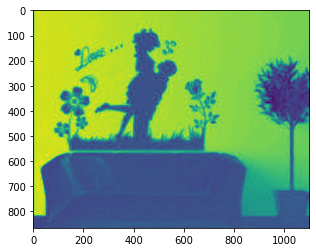

In [131]:
# Splitting the LAB image to different channels
plt.imshow(a)

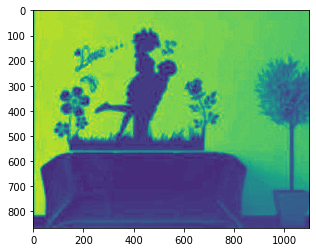

In [132]:
# Splitting the LAB image to different channels
plt.imshow(b)

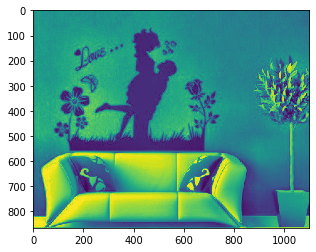

2:55: E231 missing whitespace after ','


In [133]:
# Applying CLAHE to L-channel
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)
plt.imshow(cl)

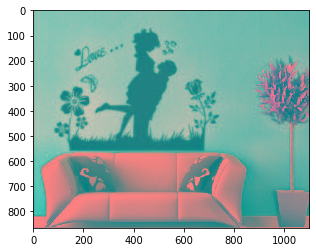

2:21: E231 missing whitespace after ','
2:23: E231 missing whitespace after ','


In [134]:
# Merge the CLAHE enhanced L-channel with the a and b channel
limg = cv2.merge((cl,a,b))
plt.imshow(limg)

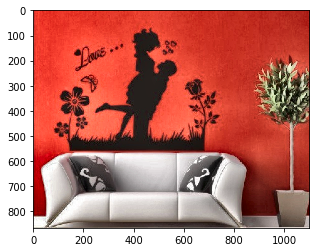

In [137]:
# Converting image from LAB Color model to RGB model
final = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
plt.imshow(final)

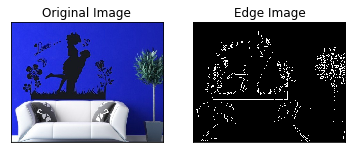

1:24: E231 missing whitespace after ','
1:28: E231 missing whitespace after ','
2:17: E231 missing whitespace after ','
2:38: E251 unexpected spaces around keyword / parameter equals
2:40: E251 unexpected spaces around keyword / parameter equals
4:17: E231 missing whitespace after ','
4:40: E251 unexpected spaces around keyword / parameter equals
4:42: E251 unexpected spaces around keyword / parameter equals


In [139]:
edges = cv2.Canny(final, 100, 200)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges, cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

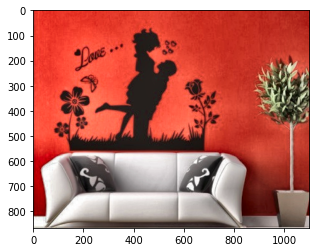

In [141]:
blurred_img = cv2.blur(final, ksize=(5, 5))
plt.imshow(blurred_img)

In [144]:
med_val = np.median(blurred_img)
lower = int(max(0 ,0.7*med_val))
upper = int(min(255,1.3*med_val))
edges = cv2.Canny(image=final, threshold1=lower,threshold2=upper)

2:18: E203 whitespace before ','
2:19: E231 missing whitespace after ','
3:20: E231 missing whitespace after ','
4:48: E231 missing whitespace after ','


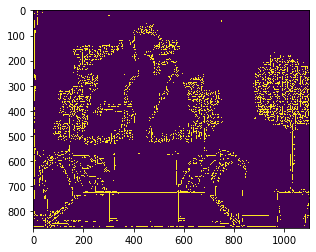

In [145]:
plt.imshow(edges)

In [146]:
med_val

83.0

In [148]:
med_val_final = np.median(final)
med_val_final

83.0

In [151]:
gray_final = cv2.cvtColor(final, cv2.COLOR_RGB2GRAY)

In [152]:
binarized = cv2.adaptiveThreshold(gray_final, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 41, 3) 

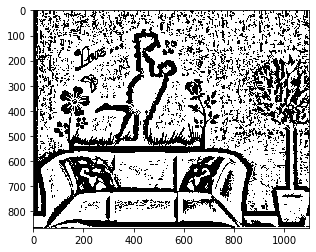

1:27: E251 unexpected spaces around keyword / parameter equals
1:29: E251 unexpected spaces around keyword / parameter equals


In [154]:
plt.imshow(binarized, cmap = 'gray')

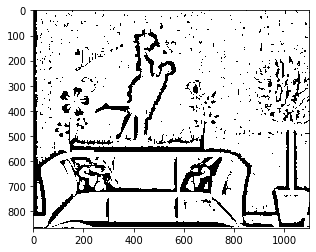

2:51: E251 unexpected spaces around keyword / parameter equals
2:53: E251 unexpected spaces around keyword / parameter equals
3:25: E251 unexpected spaces around keyword / parameter equals
3:27: E251 unexpected spaces around keyword / parameter equals


In [164]:
kernel = np.ones((5, 5), np.uint8)
dilated = cv2.dilate(binarized, kernel, iterations = 1)
plt.imshow(dilated, cmap='gray')

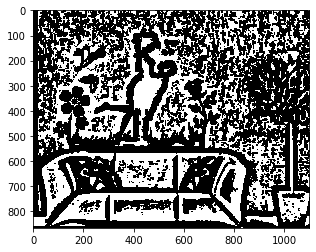

2:49: E251 unexpected spaces around keyword / parameter equals
2:51: E251 unexpected spaces around keyword / parameter equals


In [165]:
kernel = np.ones((5, 5), np.uint8)
eroded = cv2.erode(binarized, kernel, iterations = 1)
plt.imshow(eroded, cmap='gray')

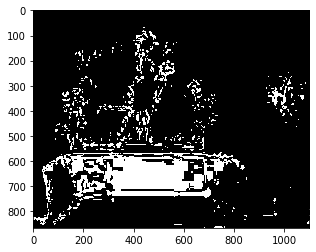

2:27: E231 missing whitespace after ','
2:48: E262 inline comment should start with '# '
3:48: E262 inline comment should start with '# '
3:80: E501 line too long (87 > 79 characters)
5:28: E231 missing whitespace after ','
5:35: E231 missing whitespace after ','
5:41: E262 inline comment should start with '# '
7:4: E231 missing whitespace after ','
7:44: E262 inline comment should start with '# '
8:20: E251 unexpected spaces around keyword / parameter equals
8:22: E251 unexpected spaces around keyword / parameter equals


In [163]:
# alternate by swithing to HSV space, Hue channel
hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)  #---Converting RGB image to HSV
hue, saturation, value, = cv2.split(hsv_img)   #---Splitting HSV image to 3 channels---

blur = cv2.GaussianBlur(hue,(3, 3),0)   #---Blur to smooth the edges---

ret,th = cv2.threshold(blur, 38, 255, 0)   #---Binary threshold---
plt.imshow(th, cmap = 'gray')

## SIFT

In [ ]:
# sift features extractor
sift = cv2.xfeatures2d.SIFT_create()

In [ ]:
# extract features @path
def extract_features(img_path, model):

    # load image and convert it to grayscale
    # img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # load image
    img = cv2.imread(img_path)
    # detect key points and descriptors
    keypoints, descriptors = model.detectAndCompute(img, None)

    # returns keypoints and descriptors
    return keypoints, descriptors

In [ ]:
img_name = data['image'].loc[85]
img_path = os.path.join('Data/Images', img_name)

In [ ]:
img = cv2.imread(img_path, cv2.COLOR_BGR2RGB)

In [ ]:
# keypoints & descriptors of the sample image
img_keypoints, img_descriptors = extract_features(img_path, sift)

In [ ]:
# paste to image
img_sift = cv2.drawKeypoints(image=img,
                             keypoints=img_keypoints,
                             outImage=None,
                             flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 

In [ ]:
plt.imshow(img)
plt.imshow(img_sift)
plt.title("SIFT descriptors")

In [ ]:
img_descriptors.shape

In [ ]:
img_name = data['image'].loc[84]
img_path = os.path.join('Data/Images', img_name)

In [ ]:
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

In [ ]:
# keypoints & descriptors of the sample image
img_keypoints, img_descriptors = extract_features(img_path, sift)

In [ ]:
# paste to image
img_sift = cv2.drawKeypoints(image=img,
                             keypoints=img_keypoints,
                             outImage=None,
                             flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 

In [ ]:
plt.imshow(img)
plt.imshow(img_sift)
plt.title("SIFT descriptors")
plt.axis('off')

In [ ]:
img_descriptors.shape

while number of features is alwayds 128 for SIFT, the number of descriptors is not the same for different pictures.

Gray- scale images rather than color images are generally used to get SIFT descriptors in order to reduce the complexity. The regions which have a similar grayscale level but different hues tend to produce wrong matching results in this case.

### organizer : compute processing and fill cat folders

In [ ]:
# input and ouput path
dir_read = 'Data/Images'
dir_write = 'Data/Processed_Images'

for index, row in data.iterrows():
    # get url of the product's image
    img_name = row['image']
    # create the path to the image file
    img_path = os.path.join(dir_read, img_name)
    # Read the file and convert it to color image
    img_file = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_file, cv2.COLOR_BGR2RGB)
    # resize the image to 500*500 pixels
    '''
    img_sqr = resize2SquareKeepingAspectRation(
        img_rgb,
        size=500,
        interpolation=cv2.INTER_AREA)
    '''
    # auto-adjustment of contrast and luminosity
    # img_preprocessed, alpha, beta = automatic_brightness_and_contrast(img_sqr)
    # save the preprocessed image
    if not os.path.exists(os.path.join(dir_write, row['cat_lvl_1'])):
        os.makedirs(os.path.join(dir_write, row['cat_lvl_1']))
    img_preprocessed_path = os.path.join(dir_write, row['cat_lvl_1'], img_name)
    cv2.imwrite(img_preprocessed_path, img_rgb)

## feature matching with SIFT

based on the assumption that a better matching would enhance classification

In [ ]:
def assessMatching(img1, img2):
    # sift
    sift = cv2.xfeatures2d.SIFT_create()

    keypoints_1, descriptors_1 = sift.detectAndCompute(img1, None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(img2, None)

    # feature matching
    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

    matches = bf.match(descriptors_1, descriptors_2)
    matches = sorted(matches, key=lambda x: x.distance)

    img1_sift = cv2.drawKeypoints(image=img1,
                                  keypoints=keypoints_1,
                                  outImage=None,
                                  flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    img2_sift = cv2.drawKeypoints(image=img2,
                                  keypoints=keypoints_2,
                                  outImage=None,
                                  flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    img3 = cv2.drawMatches(img1,
                           keypoints_1,
                           img2,
                           keypoints_2,
                           matches[:50],
                           img2,
                           flags=2)

    gs = gridspec.GridSpec(2, 2)
    fig = plt.figure(figsize=(10, 10))
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.imshow(img1_sift)
    ax1.title.set_text('img1 keypoints')
    ax1.axis('off')
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.imshow(img2_sift)
    ax2.title.set_text('img2 keypoints')
    ax2.axis('off')
    ax3 = fig.add_subplot(gs[1, :])
    ax3.imshow(img3)
    ax3.title.set_text('matching')
    ax3.axis('off')
    plt.show()

    print('number of keypoints left image : %d' % len(keypoints_1))
    print('number of keypoints right image : %d' % len(keypoints_2))
    print('total number of matches : %d ' % len(matches))

In [ ]:
# read two images
img1 = cv2.imread(
    'Data/Processed_Images/Baby Care/2c8912b849cf73676d025aa99203b6d1.jpg')
img2 = cv2.imread(
    'Data/Processed_Images/Baby Care/46ca672fdfff8a1b3641642a9795344a.jpg')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

assessMatching(img1, img2)

In [ ]:
# read two images
img1 = cv2.imread(
    'Data/Processed_Images/Baby Care/2c8912b849cf73676d025aa99203b6d1.jpg')
img2 = cv2.imread(
    'Data/Processed_Images/Baby Care/46ca672fdfff8a1b3641642a9795344a.jpg')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

assessMatching(img1, img2)

In [ ]:
# read two images
img1 = cv2.imread(
    'Data/Processed_Images/Baby Care/32da1bbf4f523bc8a8735701ce4b7726.jpg')
img2 = cv2.imread(
    'Data/Processed_Images/Baby Care/46ca672fdfff8a1b3641642a9795344a.jpg')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

assessMatching(img1, img2)

In [ ]:
# read two images
img1 = cv2.imread(
    'Data/Processed_Images/Baby Care/32da1bbf4f523bc8a8735701ce4b7726.jpg')
img2 = cv2.imread(
    'Data/Processed_Images/Baby Care/46ca672fdfff8a1b3641642a9795344a.jpg')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

assessMatching(img1, img2)

In [ ]:
# read two images
img1 = cv2.imread(
    'Data/Processed_Images/Baby Care/32da1bbf4f523bc8a8735701ce4b7726.jpg')
img2 = cv2.imread(
    'Data/Processed_Images/Baby Care/84b2e623a4a4327b88f7fe197a09be31.jpg')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

assessMatching(img1, img2)

In [ ]:
# read two images
img1 = cv2.imread(
    'Data/Processed_Images/Baby Care/70461caa9038cfa34d109ea056d57f5a.jpg')
img2 = cv2.imread(
    'Data/Processed_Images/Baby Care/634c89325a6c7752985a74a67f985c1f.jpg')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

assessMatching(img1, img2)

In [ ]:
data[data['image'] == 'fe05e9ff9e31a310c35626ab6f2b4fe2.jpg']

In [ ]:
# read two images
img1 = cv2.imread(
    'Data/Processed_Images/Baby Care/2c8912b849cf73676d025aa99203b6d1.jpg')
img2 = cv2.imread(
    'Data/Processed_Images/Baby Care/46ca672fdfff8a1b3641642a9795344a.jpg')

auto_img1, alpha, beta = automatic_brightness_and_contrast(img1)
print('alpha img1', alpha)
print('beta img1', beta)
plt.imshow(auto_img1)

auto_img2, alpha, beta = automatic_brightness_and_contrast(img2)
print('alpha img1', alpha)
print('beta img1', beta)
plt.imshow(auto_img2)

auto_img1 = cv2.cvtColor(auto_img1, cv2.COLOR_BGR2GRAY)
auto_img2 = cv2.cvtColor(auto_img2, cv2.COLOR_BGR2GRAY)


assessMatching(auto_img1, auto_img2)

In [ ]:
# read two images
img1 = cv2.imread(
    'Data/Processed_Images/Baby Care/32da1bbf4f523bc8a8735701ce4b7726.jpg')
img2 = cv2.imread(
    'Data/Processed_Images/Baby Care/84b2e623a4a4327b88f7fe197a09be31.jpg')

auto_img1, alpha, beta = automatic_brightness_and_contrast(img1)
print('alpha img1', alpha)
print('beta img1', beta)
plt.imshow(auto_img1)

auto_img2, alpha, beta = automatic_brightness_and_contrast(img2)
print('alpha img1', alpha)
print('beta img1', beta)
plt.imshow(auto_img2)


auto_img1 = cv2.cvtColor(auto_img1, cv2.COLOR_BGR2GRAY)
auto_img2 = cv2.cvtColor(auto_img2, cv2.COLOR_BGR2GRAY)


assessMatching(auto_img1, auto_img2)

### BoVW bags of visual words

Descriptors cannot be stored easily because of various sizes. We catch the desriptors with resulting dedicated dataframes.

In [ ]:
# initializations
dir_name = 'Data/SAmple_Images'
data_sample.loc[:, 'descriptors'] = pd.Series(index=data_sample.index)
data_sample.loc[:, 'descriptors'] = data_sample['descriptors'].astype(object)

In [ ]:
# computing descriptors for each image of product
for index, row in data_sample.iterrows():
    # get url of the product's image
    img_name = row['image']
    # create the path to the image file
    img_path = os.path.join(dir_name, img_name)
    # get the keypoints and descriptors of image
    img_keypoints, img_descriptors = extract_features(img_path, sift)
    # add descriptors into a new column of the dataframe
    data_sample.at[index, 'descriptors'] = img_descriptors

In [ ]:
# aggregation of the descriptors of ALL images
for index, row in data_sample.iterrows():
    if 'descriptors' not in globals():
        # creation of the agregation object for descriptors
        descriptors = row['descriptors']
    else:
        # to deal with the case where no descriptors were found
        if row['descriptors'] is not None:
            # concatenation of the descriptors
            descriptors = np.concatenate(
                (descriptors, row['descriptors']),
                axis=0)
print(descriptors.shape)

In [ ]:
print(descriptors.shape[0] / data_sample.shape[1])

# 5. Combine and reduce

In this section, we build the combination of text & image features. Then we reduce dim before clustering.

# 6. Clustering

In this section, we compute 7 clusters and assess the clustering through ARI calculation. 